In [13]:
#imports 
from path import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
#import statsapi
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
filepath = Path("../Data/TracfloDataFullSet.csv")
changeorder = pd.read_csv(filepath)
changeorder.head()

,total,paid_total,balance,breakdowns_labor_0_hours,breakdowns_labor_0_rate,breakdowns_material_0_rate,Slug,Total,Labor0Breakdown_quantity0total0,Labor0Breakdown_hourstotal,Labor0Breakdown_ratetotal
0,133000.0,0.0,133000.0,8.0,0.0,0.0,193.0,133000.0,0.0,8.0,165.0
1,27248.0,0.0,27248.0,8.0,0.0,0.0,248.0,27248.0,0.0,8.0,0.0
2,-5000.0,0.0,-5000.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0
3,13852.0,0.0,13852.0,0.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,8.0,0.0,0.0,253.0,0.0,0.0,8.0,0.0


In [5]:
 #marks 1 for data that is within labor rate of 1 to 800
changeorder["target"]=np.where(changeorder["breakdowns_labor_0_rate"].between(1,800),1,0)

In [6]:
#new df 
changeorder.head()

,total,paid_total,balance,breakdowns_labor_0_hours,breakdowns_labor_0_rate,breakdowns_material_0_rate,Slug,Total,Labor0Breakdown_quantity0total0,Labor0Breakdown_hourstotal,Labor0Breakdown_ratetotal,target
0,133000.0,0.0,133000.0,8.0,0.0,0.0,193.0,133000.0,0.0,8.0,165.0,0
1,27248.0,0.0,27248.0,8.0,0.0,0.0,248.0,27248.0,0.0,8.0,0.0,0
2,-5000.0,0.0,-5000.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0
3,13852.0,0.0,13852.0,0.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,8.0,0.0,0.0,253.0,0.0,0.0,8.0,0.0,0


In [22]:
# drop na
changeorder.dropna(inplace=True)

In [24]:
# create x variable 
X = changeorder.copy()
X.drop(["target"], axis=1, inplace=True)
X.isnull().sum()

total                              0
paid_total                         0
balance                            0
breakdowns_labor_0_hours           0
breakdowns_labor_0_rate            0
breakdowns_material_0_rate         0
Slug                               0
Total                              0
Labor0Breakdown_quantity0total0    0
Labor0Breakdown_hourstotal         0
Labor0Breakdown_ratetotal          0
dtype: int64

In [25]:
# create target y variable 
y = changeorder["target"].ravel()

In [26]:
# train test split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
#scale data 
scaler = StandardScaler()

In [28]:
#fit data 
X_scaler = scaler.fit(X_train)

In [29]:
#scale data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
#random forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [31]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [32]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [33]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,382,0
Actual 1,0,56


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        56

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [34]:
importances = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3802402846217181, 'breakdowns_labor_0_rate'),
 (0.23237285523216158, 'breakdowns_labor_0_hours'),
 (0.11900607719715695, 'Labor0Breakdown_ratetotal'),
 (0.10831464000468356, 'Slug'),
 (0.03974046887131919, 'Total'),
 (0.03643656731180033, 'breakdowns_material_0_rate'),
 (0.03580477585561155, 'Labor0Breakdown_quantity0total0'),
 (0.02908912918094049, 'Labor0Breakdown_hourstotal'),
 (0.008132027423759989, 'total'),
 (0.006838189459815905, 'balance'),
 (0.004024984841032357, 'paid_total')]

In [35]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, ratio=1.0).fit_resample( X_train, y_train)
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

Counter(y_resampled)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report_imbalanced(y_test, y_pred))

Using TensorFlow backend.


                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.96      0.91      0.97      0.94      0.88       382
          1       0.77      0.91      0.96      0.84      0.94      0.87        56

avg / total       0.96      0.95      0.92      0.96      0.94      0.88       438



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from IPython.display import Image

In [37]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000



In [38]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.25,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [39]:
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 1.0


In [40]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,382,0
Actual 1,0,56


In [41]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        56

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



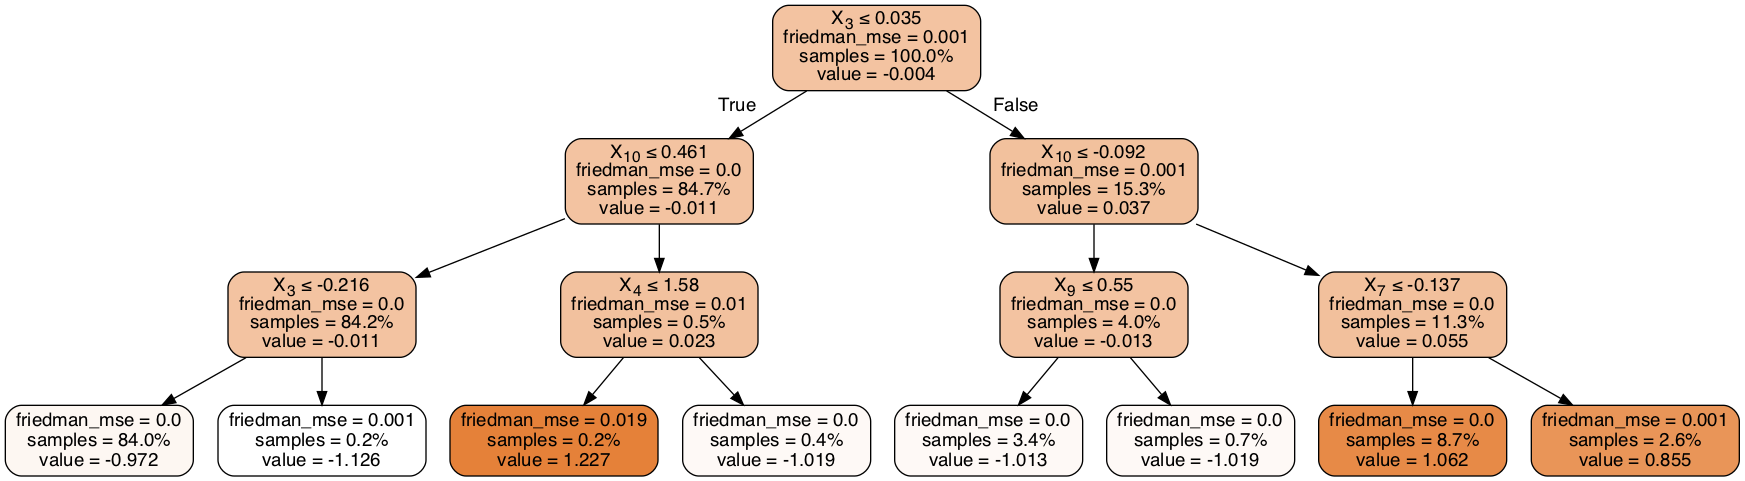

In [42]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [43]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)
model = LogisticRegression(random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)


confusion_matrix(y_test, y_pred)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[376,   6],
       [  1,  55]])

In [44]:
balanced_accuracy_score(y_test, y_pred)

0.9832180254300673

In [52]:
from xgboost import XGBClassifier

In [53]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [55]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [56]:
importances = model.feature_importances_

importances_data = sorted(zip(model.feature_importances_, X.columns), reverse=True)

In [57]:
confusion_matrix(y_test, y_pred)

array([[382,   0],
       [  0,  56]])

In [58]:
df_features = pd.DataFrame(importances_data)


In [59]:
df_top_ten_features = df_features[:10]
df_top_ten_features.columns =['percentage', 'feature name']

In [60]:
import hvplot.pandas

In [61]:
df_top_ten_features.hvplot.bar( x='feature name', y='percentage', rot=60)

:Bars   [feature name]   (percentage)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras import losses
import seaborn
from scipy.stats import poisson,skellam

In [64]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Train on 1313 samples
Epoch 1/100
1313/1313 [==============================] - 1s 493us/sample - loss: 0.4651 - accuracy: 0.9756
Epoch 2/100
1313/1313 [==============================] - 0s 36us/sample - loss: 0.3107 - accuracy: 0.9832
Epoch 3/100
1313/1313 [==============================] - 0s 37us/sample - loss: 0.2031 - accuracy: 0.9817
Epoch 4/100
1313/1313 [==============================] - 0s 36us/sample - loss: 0.1327 - accuracy: 0.9787
Epoch 5/100
1313/1313 [==============================] - 0s 36us/sample - loss: 0.0915 - accuracy: 0.9787
Epoch 6/100
1313/1313 [==============================] - 0s 35us/sample - loss: 0.0700 - accuracy: 0.9817
Epoch 7/100
1313/1313 [==============================] - 0s 35us/sample - loss: 0.0586 - accuracy: 0.9832
Epoch 8/100
1313/1313 [==============================] - 0s 35us/sample - loss: 0.0523 - accuracy: 0.9848
Epoch 9/100
1313/1313 [==============================] - 0s 36us/sample - loss: 0.0486 - accuracy: 0.9840
Epoch 10/100
1313/1313 

In [66]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

438/1 - 0s - loss: 0.0025 - accuracy: 1.0000
Normal Neural Network - Loss: 0.004142863539070929, Accuracy: 1.0


In [67]:
predicted = model.predict(X_test_scaled)


In [68]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predicted.ravel()
})

In [69]:
results.head(10)


,Actual,Predicted
0,1,9.974154e-01
1,0,2.404588e-02
2,0,1.037419e-04
3,0,3.308058e-05
4,0,0.000000e+00
5,0,1.192093e-07
6,0,5.453825e-06
7,0,2.652407e-06
8,0,5.048513e-05
9,0,1.085788e-03


In [84]:
# Create a DataFrame with the history dictionary
df_epoch = pd.DataFrame(
    model.history, index=range(1, len(model.history["loss"]) + 1)
)
# Plot the loss
df_moon.plot(y="loss")


TypeError: 'History' object is not subscriptable

In [73]:
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [74]:
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)


Train on 1225 samples, validate on 526 samples
Epoch 1/200
1225/1225 [==============================] - 0s 115us/sample - loss: 15941331.3272 - mse: 15941329.0000 - val_loss: 234847.8441 - val_mse: 234847.8125
Epoch 2/200
1225/1225 [==============================] - 0s 36us/sample - loss: 8611681.9829 - mse: 8611681.0000 - val_loss: 172587.6074 - val_mse: 172587.6094
Epoch 3/200
1225/1225 [==============================] - 0s 44us/sample - loss: 5007340.7061 - mse: 5007340.5000 - val_loss: 172692.8186 - val_mse: 172692.8281
Epoch 4/200
1225/1225 [==============================] - 0s 60us/sample - loss: 3382382.1374 - mse: 3382382.2500 - val_loss: 194196.3370 - val_mse: 194196.3125
Epoch 5/200
1225/1225 [==============================] - 0s 59us/sample - loss: 2421644.6278 - mse: 2421644.7500 - val_loss: 177255.4278 - val_mse: 177255.4219
Epoch 6/200
1225/1225 [==============================] - 0s 45us/sample - loss: 1810989.0273 - mse: 1810988.8750 - val_loss: 151315.7457 - val_mse: 15

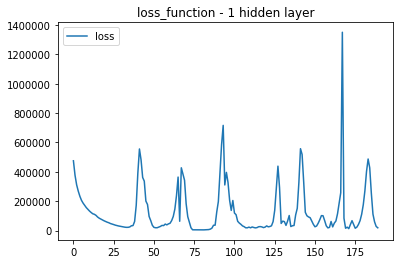

In [75]:
plt.plot(model_1.history["loss"][10:200])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [78]:
number_input_features = 11
hidden_nodes_layer1 = 252
hidden_nodes_layer2 = 126

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


In [79]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=20)

Train on 1225 samples, validate on 526 samples
Epoch 1/20
1225/1225 [==============================] - 0s 132us/sample - loss: 116003440.2278 - mse: 116003416.0000 - val_loss: 10678826.8251 - val_mse: 10678827.0000
Epoch 2/20
1225/1225 [==============================] - 0s 45us/sample - loss: 168507380.3629 - mse: 168507376.0000 - val_loss: 2216180.4572 - val_mse: 2216180.5000
Epoch 3/20
1225/1225 [==============================] - 0s 45us/sample - loss: 88537848.2762 - mse: 88537856.0000 - val_loss: 2422938.4506 - val_mse: 2422938.2500
Epoch 4/20
1225/1225 [==============================] - 0s 44us/sample - loss: 144312243.5410 - mse: 144312256.0000 - val_loss: 1685320.0985 - val_mse: 1685320.0000
Epoch 5/20
1225/1225 [==============================] - 0s 43us/sample - loss: 130835080.8824 - mse: 130835096.0000 - val_loss: 3347238.4696 - val_mse: 3347238.5000
Epoch 6/20
1225/1225 [==============================] - 0s 45us/sample - loss: 37052798.7502 - mse: 37052788.0000 - val_loss: 3

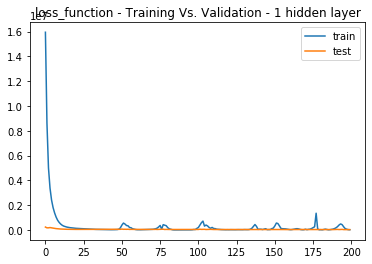

In [80]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

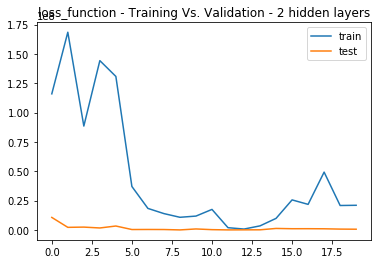

In [81]:
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [82]:
model_loss, model_accuracy = model_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

AttributeError: 'History' object has no attribute 'evaluate'